# Group 

Groupmembers are:


|Gender|Firstname|Surname|Email| Study program| Semester| Student ID|
|:----:|:--------|:------|:----|:----------|:------------|:--------|
| f | Larissa | Jesus | larissa.ldjesus@student.uni-siegen.de| HCI| 4|1589319|
| f | Cam Van | Tran Thi | cam.tranthi@student.uni-siegen.de | HCI | 4 | 1542660 |
| m |Roberto|Ruiz|rroberto.rruiz@gmail.com|HCI|1|1692619|

    
**Course**: First steps into Artificial Intelligence: Organization & Introduction

**Examiner**: Prof. Dr. Thomas Ludwig

**Semester**: Summersemester 2022

**Submission date**: 31. July 2022

**City**: Siegen, Germany


In [1]:
!pip install pyod

In [2]:
# Importing the necessary libraries for the data mining process
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pyod.models.knn import KNN
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

In [3]:
# Importing the dataset
datapath = "data/diamonds_FSAI_SoSe22.csv"
raw_df = pd.read_csv(datapath, index_col = 0)

## Business Understanding

A jewelry store named “CHARM” regularly buys diamonds of various sizes, cuts and colors to make and sell all kinds of diamond jewelry for customers.  The owner of the store aims to offer a fair price for his jewelry products in order to increase customer satisfaction, attract new customers and have more revenues. Thus, he wants to have a quick but accurate estimation of the diamond’s price and diamond’s cut using AI supported solution. 

Apart from the links mentioned in the report, here are a few more links we used for the business understanding stage:

- [How do you calculate diamond measurements?](https://www.briangavindiamonds.com/news/how-do-you-calculate-diamond-measurements/)
- [What is the formula for total depth of a diamond if you know the diameter?](https://www.briangavindiamonds.com/news/what-is-the-formula-for-total-depth-of-a-diamond-if-you-know-the-diameter/)

## Data Understanding

The diamonds dataset has 45849 entries (rows) and 10 features (columns) which are:

**Carat**: Carat weight of the diamond (0.2 - 5.01)

**Cut**: Describe cut quality of the diamond in increasing order: Fair, Good, Very Good, Premium, Ideal

**Color**: Color of the diamond, with D being the best and J the worst 

**Clarity**: Describe how obvious inclusions are within the diamond: (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**Depth**: The height of a diamond, measured from the culet to the table, divided by its average girdle diameter (43 - 79%)

**Table**: The width of the diamond's table expressed as a percentage of its average diameter (43 - 95%)

**Price**: the price of the diamond in US dollars ($326 - $18,818)

**X**: length (0 - 10.74 mm)

**Y**: width (0 - 58.9 mm)

**Z**: depth (0 - 31.8 mm)


In [4]:
# Checking dimension of the dataset
raw_df.shape

(45849, 10)

The description of the whole dataset shows that x, y, z have 0 values, which means these entries have incomplete information and should be removed.

In [5]:
# Checking description of the whole dataset
raw_df.describe()

,carat,depth,table,price,x,y,z
count,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000
mean,0.797251,61.749371,57.456823,3925.804772,5.729115,5.732836,3.537766
std,0.473729,1.436693,2.234886,3982.937163,1.122093,1.147394,0.707841
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,948.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2398.000000,5.700000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5327.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18818.000000,10.740000,58.900000,31.800000


There are 17 rows which have 0 values in the dataset to remove

In [6]:
# Checking the number of rows with 0 values
num_values_0 = raw_df[
    (raw_df['x'] == 0) |
    (raw_df['y'] == 0) |
    (raw_df['z'] == 0)
]
len(num_values_0)

17

Checking information of the dataset, we see that “cut, color and clarity” have object type (i.e. categorical type), the other 7 features have numerical type (6 float64 or 1 int64). There is also no null values in the dataset.

In [7]:
# Checking the information of the dataset
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45849 entries, 0 to 45848
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    45849 non-null  float64
 1   cut      45849 non-null  object 
 2   color    45849 non-null  object 
 3   clarity  45849 non-null  object 
 4   depth    45849 non-null  float64
 5   table    45849 non-null  float64
 6   price    45849 non-null  int64  
 7   x        45849 non-null  float64
 8   y        45849 non-null  float64
 9   z        45849 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


The correlation heatmap indiates that Price is highly correlated to carat and x, y, z.

Text(0.5, 1.0, 'Correlation map')

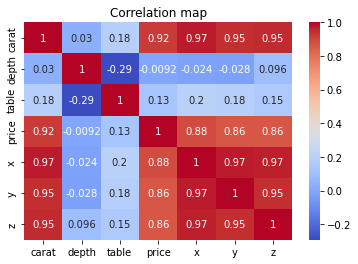

In [8]:
# Checking the correlations among the features
graph = sns.heatmap(
    raw_df.corr(),
    annot = True,
    cmap = 'coolwarm'
)
graph.set_title("Correlation map")


The graphical plots of numerical features (i.e. carat, x, y, z, price, depth, table,) show that there are outliers in the dataset

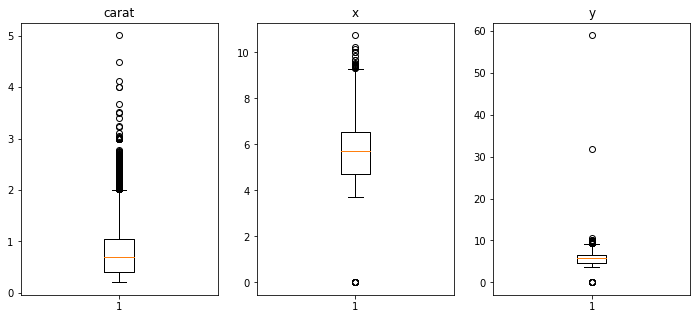

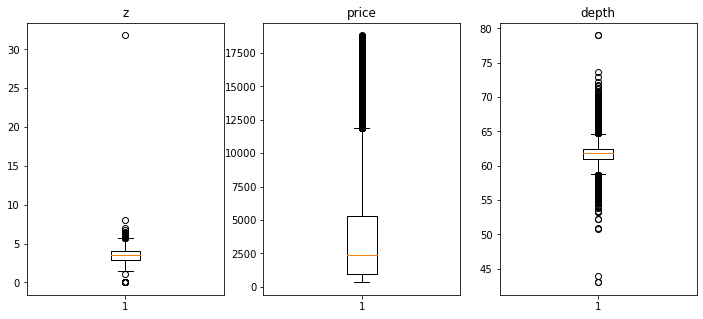

Text(0.5, 1.0, 'table')

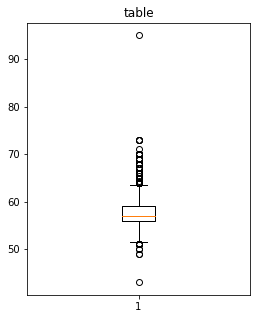

In [9]:
# Using boxplot to identify outliers in the dataset
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,5))
ax[0].boxplot(raw_df['carat'])
ax[0].set_title('carat')
ax[1].boxplot(raw_df['x'])
ax[1].set_title('x')
ax[2].boxplot(raw_df['y'])
ax[2].set_title('y')

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,5))
ax[0].boxplot(raw_df['z'])
ax[0].set_title('z')
ax[1].boxplot(raw_df['price'])
ax[1].set_title('price')
ax[2].boxplot(raw_df['depth'])
ax[2].set_title('depth')
plt.show()

fig, ax = plt.subplots(figsize=(4,5))
ax.boxplot(raw_df['table'])
ax.set_title('table')

Plotting the distribution of the price, we realize that most of the diamonds in the dataset have a low price (<$7500)

<AxesSubplot:title={'center':'Diamond price distribution'}, ylabel='Frequency'>

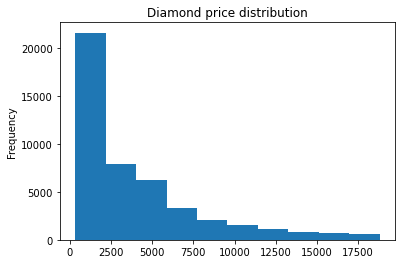

In [10]:
# Plotting the price distribution
raw_df.price.plot.hist(title="Diamond price distribution")

the statistics and pie graph of diamond's cut reveals that most of the diamond’s cut are Ideal, Premium and Very Good (account for 87.85%)

In [11]:
# Checking the quantity of each type of cut
raw_df['cut'].value_counts()

Ideal        18350
Premium      11645
Very Good    10282
Good          4194
Fair          1378
Name: cut, dtype: int64

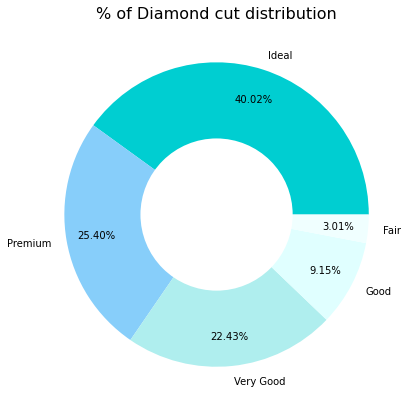

In [12]:
# Plotting the percentage distribution of the diamond's cut
cut_palette = ["darkturquoise", "lightskyblue", "paleturquoise", "lightcyan", "azure"]
df_cut = raw_df['cut'].value_counts()
plt.figure(figsize = (7,7))
plt.pie(
    data = df_cut, 
    x = df_cut.values,
    labels = df_cut.index,
    autopct = "%.2f%%",
    pctdistance = 0.8,
    colors = cut_palette
)
circle = plt.Circle(xy = (0, 0), radius = 0.5, facecolor = 'white')
plt.gca().add_artist(circle)
plt.title("% of Diamond cut distribution", size = 16)
plt.show()

**In summary, through data exploration we found out that:**
- We need to remove outliers, and rows with 0 values 
- "cut, color and clarity” have categorical type, should be encoded into numbers
- "price, carat, x, y, z” have high correlations


## Data Preparation

We start by removing 0 values

In [13]:
# Removing 0 values in x, y, z
raw_df = raw_df.drop(raw_df[raw_df['x'] == 0].index)
raw_df = raw_df.drop(raw_df[raw_df['y'] == 0].index)
raw_df = raw_df.drop(raw_df[raw_df['z'] == 0].index)

We encode categorial datat to numerical data, identify and remove outliers in the dataset

In [14]:
# Creating the dataset for the regression problem
df_reg = raw_df.copy()

In [15]:
# Transforming categorical data in numerical data in the regression dataset
# ordinal encode 'cut', 'color', 'clarity'
df_reg['cut'] = df_reg['cut'].map({'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5})
df_reg['color'] = df_reg['color'].map({'J':1,'I':2,'H':3,'G':4,'F':5,'E':6,'D':7})
df_reg['clarity'] = df_reg['clarity'].map({'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8})

In [16]:
# Creating and fitting an outlier detector
detector = KNN()
detector.fit(df_reg)
outliers_reg = detector.labels_

In [17]:
# Creating a column in the dataset to identify the outliers
df_reg['outliers'] = outliers_reg

In [18]:
# Creating an array with outlier indexes
index_outliers = df_reg[df_reg['outliers'] == 1].index.values

In [19]:
# Removing the outliers
for i in index_outliers:
    df_reg = df_reg.drop(index=i)

In [20]:
# Removing the outliers column
df_reg = df_reg.drop('outliers', axis=1)

In [21]:
# Creating the dataset for the classification
df_clf = raw_df.copy()
df_clf = df_clf.drop(["carat","color","price","clarity"], axis=1)

In [22]:
# Transforming the cut in numerical data
df_clf['cut'] = df_clf['cut'].map({ 'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5 })

In [23]:
# Fitting the outlier detector in the classification dataset
detector.fit(df_clf)
outliers_clf = detector.labels_

In [24]:
# Creating a column in the dataset to identify the outliers
df_clf['outliers'] = outliers_clf

In [25]:
# Creating an array with outlier indexes
index_outliers2 = df_clf[df_clf['outliers']==1].index.values

In [26]:
# Returning the text data to our labels
df_clf['cut'] = raw_df['cut']

In [27]:
# Removing the outliers
for i in index_outliers2:
    df_clf = df_clf.drop(index=i)

In [28]:
# Standardizing the classification dataset
df_clf[["depth", "table", "y", "x", "z"]] = StandardScaler().fit_transform(df_clf[["depth", "table","y","x","z"]])

In [29]:
print("In total we dropped:", raw_df.shape[0] - df_reg.shape[0])

In total we dropped: 4584


## Modeling

In [30]:
# Defining independent and dependent variables for the regression
independent_reg = df_reg.drop("price", axis=1)
dependent_reg = df_reg['price']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(independent_reg, dependent_reg, test_size=0.2, 
                                                                    random_state=42)

In [31]:
# This is the code that was used to determine the best parameters for the model
"""
  # Create the parameter grid based on the results of random search 
  rfr_param_grid = {
      'bootstrap': [True, False],
      'max_depth': [5,50,100],
      'max_features': [5,10,20,40,None],
      'min_samples_leaf': [1,10,50,100],
      'min_samples_split': [5,10],
      'n_estimators': [0,50,100], 
      'random_state' : [0,20,40,60]
  }
  
  # Create a based model
  rfr_GridSearch = RandomForestRegressor()

  # Instantiate the grid search model
  rfr_grid_search = GridSearchCV(estimator = rfr_GridSearch, param_grid = rfr_param_grid, 
                                cv = 3, n_jobs = -1, verbose = 2, scoring=['r2', 'neg_mean_absolute_error'],
                                refit='neg_mean_absolute_error')

  # Test the Model on different grid parameter
  rfr_grid_search.fit(X_train_reg, y_train_reg)
  print(rfr_grid_search.best_params_)
"""
""

''

In [32]:
# Instantiating and fitting the model
rfr = RandomForestRegressor(
    random_state=42, 
    bootstrap= True, 
    max_depth=50, 
    max_features=5, 
    min_samples_leaf= 1, 
    min_samples_split=5, 
    n_estimators=100
)

rfr.fit(X_train_reg, y_train_reg)
y_pred_RFR = rfr.predict(X_test_reg)

In [33]:
# Tunning the hyperparameters of the classification model. This was done in
# another notebook.
"""
  rfr_param_grid = {
      'C': [0.1,1.0,10, 100, 1000],
      'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
      'gamma': ['scale', 'auto',1, 0.1, 0.01, 0.001, 0.0001],
      'shrinking': [True,False],
      'tol': [-3,1,3,5] 
  }
  #Create a based model
  rfr_GridSearch = svm.SVC()

  #Instantiate the grid search model
  rfr_grid_search = GridSearchCV(estimator = rfr_GridSearch, param_grid = rfr_param_grid, 
                                cv = 3, n_jobs = -1, verbose = 2, scoring=['accuracy'], refit='accuracy')

  #Test the Model on different grid parameter
  rfr_grid_search.fit(X_train_clf, X_test_clf)
  print(rfr_grid_search.best_params_)
"""
""

''

In [34]:
# Defining our independent and dependent variables for the classification problem
independent_clf = df_clf.drop("cut", axis=1)
dependent_clf = df_clf['cut']

# Splitting the data in training and test set for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(independent_clf, dependent_clf, test_size=0.2, 
                                                                    random_state=42)

In [35]:
# Instanciating and fitting the classification model
Model_clf = svm.SVC(
    random_state=42,
    C= 1000,
    gamma= 0.1,
    kernel='rbf',
    shrinking=False,
    tol= 1
)
Model_clf.fit(X_train_clf, y_train_clf)
y_pred_clf = Model_clf.predict(X_test_clf)

## Evaluation

In [36]:
# Evaluating the Regression Model
mse = mean_squared_error(y_test_reg, y_pred_RFR)
print("MSE : "+ str(mse))
rmse= np.sqrt(mse)
print("RMSE: "+ str(rmse))
mae = mean_absolute_error(y_test_reg, y_pred_RFR)
print("MAE : "+ str(mae))
r2 = r2_score(y_test_reg, y_pred_RFR)
print("R2  : "+ str(r2))

MSE : 156318.615062514
RMSE: 395.3714899464983
MAE : 206.63247784159444
R2  : 0.9804690270914195


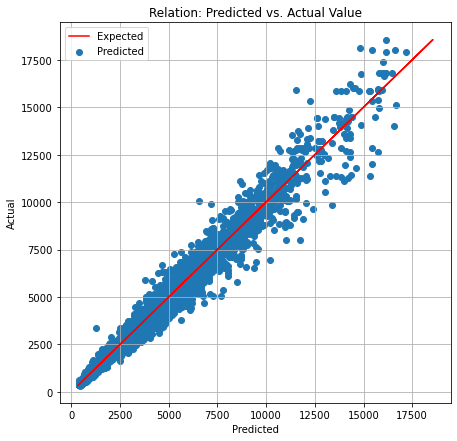

In [37]:
# Plotting the graph of the predicted  x actual actual values of the test set 
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(y_test_reg, y_test_reg, label="Expected", color = "red")
ax.scatter(y_pred_RFR, y_test_reg, label = "Predicted")

ax.set(xlabel='Predicted', ylabel='Actual',
       title='Relation: Predicted vs. Actual Value')

ax.grid()
ax.legend()

plt.show()

In [38]:
# Evaluating the classification model

print (f"Score on the training data: {Model_clf.score(X_train_clf, y_train_clf)}")
print (f"Score on the test data: {Model_clf.score(X_test_clf, y_test_clf)}")

print(classification_report(y_test_clf, y_pred_clf))

Score on the training data: 0.8180192738953876
Score on the test data: 0.8235151515151515
              precision    recall  f1-score   support

        Fair       0.96      0.98      0.97        82
        Good       0.87      0.68      0.76       588
       Ideal       0.85      0.95      0.90      3621
     Premium       0.89      0.77      0.83      2175
   Very Good       0.68      0.67      0.67      1784

    accuracy                           0.82      8250
   macro avg       0.85      0.81      0.83      8250
weighted avg       0.83      0.82      0.82      8250



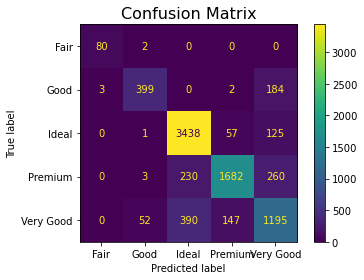

In [39]:
# Plotting a confusion matrix for the test set of the classification model
ConfusionMatrixDisplay.from_estimator(Model_clf, X_test_clf, y_test_clf)
plt.title("Confusion Matrix", size = 16)
plt.show()